# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import functions as f
import variables as v

## Load Data

In [12]:
# Load the data and convert it to a csv file

df = f.load_data('RawData4.xls')
df.head()

# Check the length of the data

print('The data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))


The data has 6005 rows and 2 columns


## Plot the Raw data

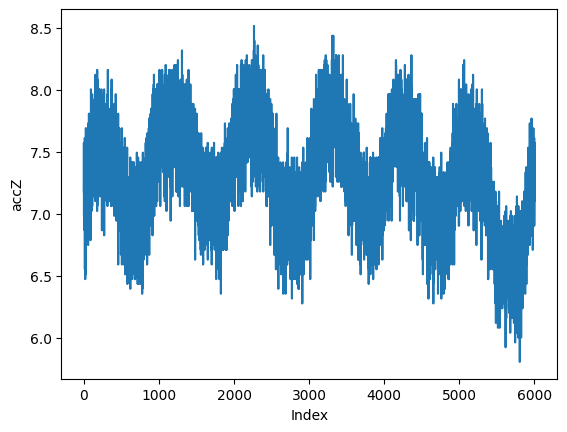

In [13]:
# Plot the raw data

f.plot_data(df)

## Data preprocessing

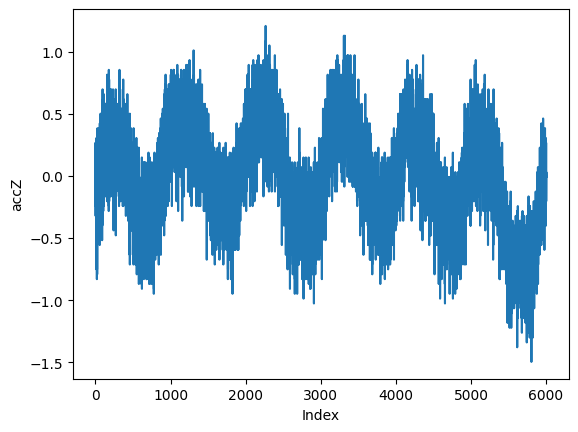

In [14]:
df = f.remove_dc_offset(df)
f.plot_data(df)

## Data preprocessing

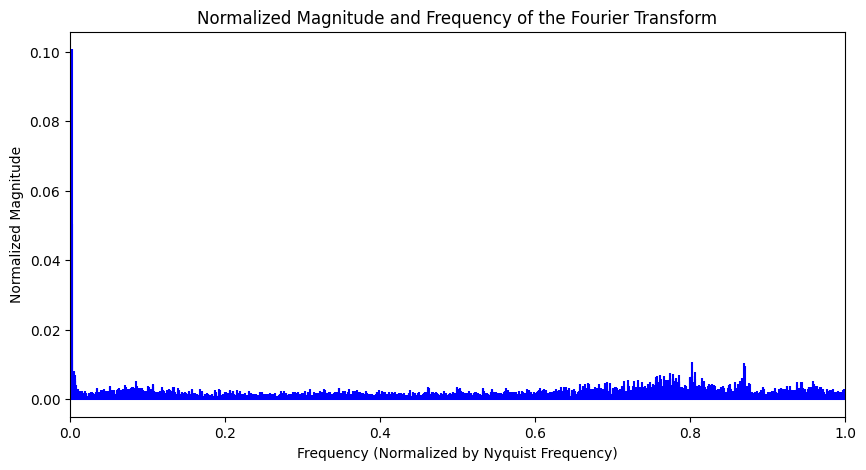

In [15]:
normalized_frequencies, normalized_magnitude = f.fourier_transform(df, v.Fs, v.nyq)

# Plot the magnitudes of the normalized frequencies
plt.figure(figsize=(10, 5))
plt.stem(normalized_frequencies, normalized_magnitude, 'b', markerfmt=" ", basefmt="-b")
plt.title('Normalized Magnitude and Frequency of the Fourier Transform')
plt.xlabel('Frequency (Normalized by Nyquist Frequency)')
plt.ylabel('Normalized Magnitude')
plt.xlim(0, 1)  
plt.show()

## Filtering

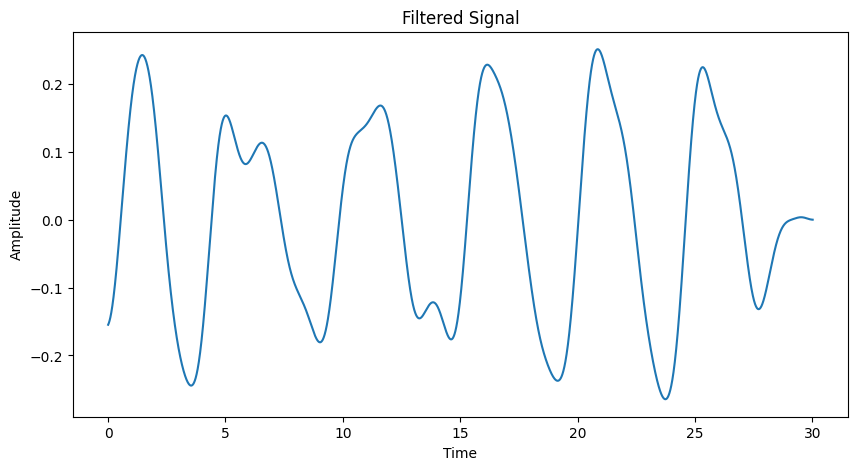

In [16]:
# Filter the signal using a butterworth filter and plot the filtered signal

filtered_df = f.apply_filter(df['accZ'], v.low_freq, v.high_freq, v.nyq, 2)

# Time in seconds

time = np.arange(df.shape[0]) / v.Fs

plt.figure(figsize=(10, 5))
plt.plot(time, filtered_df)
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Detect the peaks

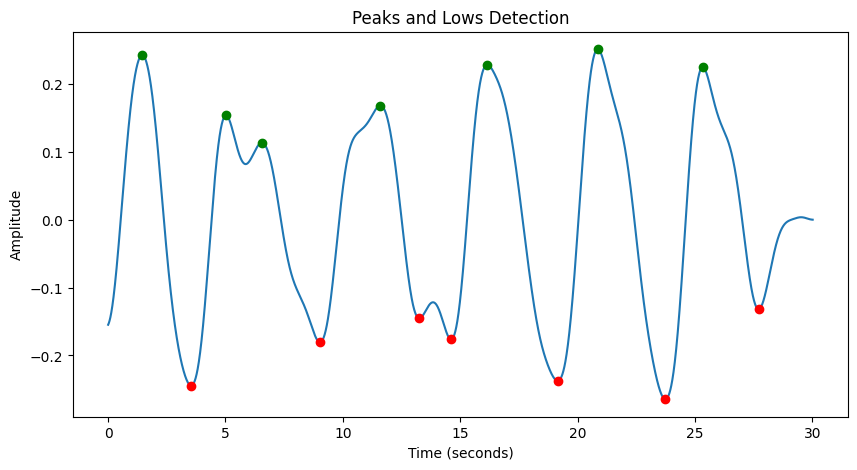

In [17]:
# Detection of the peaks

peaks, lows = f.find_peaks_and_lows(filtered_df)

plt.figure(figsize=(10, 5))
plt.plot(time, filtered_df)  # Usa 'time' come asse x
plt.plot(time[peaks], filtered_df[peaks], 'go')  # Picchi
plt.plot(time[lows], filtered_df[lows], 'ro')  # Valli
plt.title('Peaks and Lows Detection')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

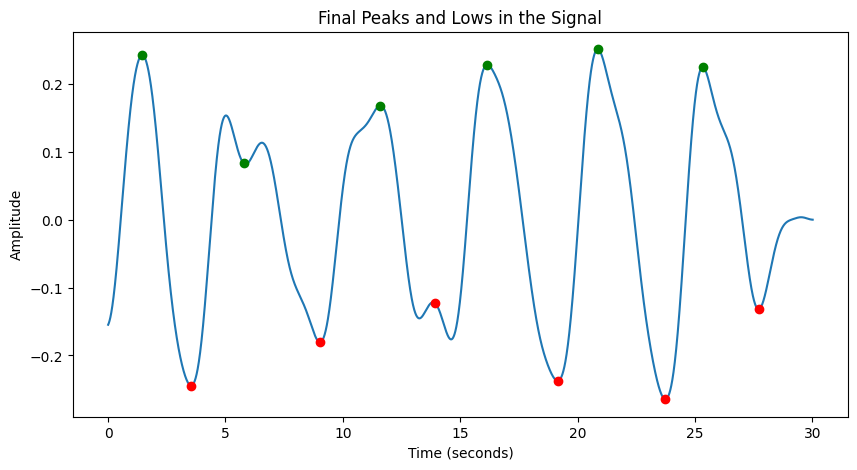

In [18]:
final_peaks = f.real_peaks(peaks, lows)
final_lows = f.real_lows(peaks, lows)


plt.figure(figsize=(10, 5))
plt.plot(time, filtered_df)  # Usa 'time' come asse x
plt.plot(time[final_peaks], filtered_df[final_peaks], 'go')  # Picchi
plt.plot(time[final_lows], filtered_df[final_lows], 'ro')  # Valli
plt.title('Final Peaks and Lows in the Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Parameters extraction

In [19]:
# Calculate the respiratory rate
respiratory_rate = f.respiratory_rate(final_peaks, v.Fs)

print(f'Respiratory rate: {respiratory_rate:.2f} breaths per minute')

Respiratory rate: 12.56 breaths per minute


In [20]:
# Calculate the mean inspiratory, expiratory times, and IER 
mean_inspiratory_time, mean_expiratory_time, IER = f.inspiratory_expiratory_time(final_peaks, final_lows, v.Fs)

# Print the mean times
print(f'Mean Inspiratory Time: {mean_inspiratory_time:.2f} s')
print(f'Mean Expiratory Time: {mean_expiratory_time:.2f} s')
print(f'Inspiratory to Expiratory Ratio: {IER:.2f}')

Mean Inspiratory Time: 2.71 s
Mean Expiratory Time: 2.07 s
Inspiratory to Expiratory Ratio: 1.31
